<center>
 <h1><b> COVID-19 </b> </h1>
</center>

Coronavirus (COVID-19) is an infectious disease caused by a new virus, which caused a lot of countries to impose nationwide lockdowns in order to prevent its spread. It is also one of the most trendy topics nowadays. A lot of public health orginazitaions from different countries release datasets reflecting the  distribution of confirmed cases and the number of deathes. Analysis of these datasets is very important in order to take necessary steps for stopping the spread of this disease. Your task will be the analysis of one of these datasets:




*   Download the COVID-19 cases worldwide dataset from:

 https://data.europa.eu/euodp/en/data/dataset/covid-19-coronavirus-data/resource/55e8f966-d5c8-438e-85bc-c7a5a26f4863

*   Read the data into Pandas Dataframe and name it `covdf`. Check that Dataframe columns are properly read.

*   For each country in the `covdf` Dataframe, determine date of the first confirmed case. Store result as a Pandas Dataframe as well. The resulting Dataframe should have 4 columns: 

  `country_ame` - Name of the country in countriesAndTerritories column  of `covdf`

  `case_date` - the date when first case happened in that ountry

  `pop_data` - popData2018 column  of `covdf`

  `cases` - the number of the cases in the date

*   Write a function which will take the `covdf` Dataframe as argument and return a new Dataframe which will have only the rows where no death has happened. The resulting Dataframe will have exactly the same columns as `covdf`, however only the rows in which there is no death.

*   Calculate the number of overall deathes for each country from `covdf`. Store the result as a Dataframe as well. The resulting Dataframe should have 2 columns: 

  `CountryName` - Name of the country in countriesAndTerritories column  of `covdf`

  `number_of_deathes` - the number of overall deathes in that country.


*   Write a function which will take the `covdf` Dataframe as argument and for each day will calculate the maximum number of deathes and in which country maximum number of deathes has happened.The resulting Dataframe should have 3 columns: 

  `date` - one row for each date in `covdf`.

  `number_of_deathes` - the number of maximum deathes for that specific `date`.

  `CountryName` - Name of the country in which maxiumum number of deathes has happened in that specific day.



*   Create a new Dataframe which will hold the number of overall deathes for each day.The resulting Dataframe should have 2 columns: 

  `date` - one row for each date in `covdf`.

  `number_of_deathes` - the number of overall deathes in that date.


*   Write a function which will take the `covdf` Dataframe and country name as argument and will visualize number of cases in that country for each day. Use Matplotlib for visualization.


*   Write a function which will take the `covdf` Dataframe and two country names as argument and will visualize number of cases in these countries for each day in the same plot. This will allow to compare the number of cases in two countries. Use Matplotlib for visualization.


*   Coronavirus disease spreads primarily through contact with an infected person when they cough or sneeze. It also spreads when a person touches a surface or object that has the virus on it, then touches their eyes, nose, or mouth. Your last task is to protect yourself :)











In [173]:
import pandas as pd

In [176]:
# Read the data into Pandas Dataframe and name it covdf
covdf = pd.read_excel("COVID-19-geographic-disbtribution-worldwide.xlsx")
# Check that Dataframe columns are properly read.
covdf.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,2020-05-01,1,5,2020,222,4,Afghanistan,AF,AFG,37172386.0,Asia
1,2020-04-30,30,4,2020,122,0,Afghanistan,AF,AFG,37172386.0,Asia
2,2020-04-29,29,4,2020,124,3,Afghanistan,AF,AFG,37172386.0,Asia
3,2020-04-28,28,4,2020,172,0,Afghanistan,AF,AFG,37172386.0,Asia
4,2020-04-27,27,4,2020,68,10,Afghanistan,AF,AFG,37172386.0,Asia


In [177]:
# For each country in the covdf Dataframe, determine date of the first confirmed case.
# Store result as a Pandas Dataframe as well. The resulting Dataframe should have 4 columns:
# country_name,case_date,pop_data,cases 
res = covdf[["countriesAndTerritories", "dateRep", "popData2018", "cases"]]
res = res.loc[res.groupby("countriesAndTerritories")["dateRep"].idxmin()]
res.rename(columns={"countriesAndTerritories": "country_name", "dateRep": "case_date", "popData2018": "pop_data"})

,country_name,case_date,pop_data,cases
112,Afghanistan,2019-12-31,37172386.0,0
166,Albania,2020-03-09,2866376.0,2
284,Algeria,2019-12-31,42228429.0,0
333,Andorra,2020-03-03,77006.0,1
374,Angola,2020-03-22,30809762.0,2
...,...,...,...,...
14127,Vietnam,2019-12-31,95540395.0,0
14133,Western_Sahara,2020-04-26,NaN,6
14155,Yemen,2020-04-10,28498687.0,1
14199,Zambia,2020-03-19,17351822.0,2


In [183]:
# Write a function which will take the covdf Dataframe as argument and return a new Dataframe which will have only the 
# rows where no death has happened. The resulting Dataframe will have exactly the same columns as covdf, 
# however only the rows in which there is no death.

def gimmeNoDeaths(df):
    return df.loc[df["deaths"] == 0].copy()

In [184]:
gimmeNoDeaths(covdf)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
1,2020-04-30,30,4,2020,122,0,Afghanistan,AF,AFG,37172386.0,Asia
3,2020-04-28,28,4,2020,172,0,Afghanistan,AF,AFG,37172386.0,Asia
12,2020-04-19,19,4,2020,63,0,Afghanistan,AF,AFG,37172386.0,Asia
18,2020-04-13,13,4,2020,52,0,Afghanistan,AF,AFG,37172386.0,Asia
20,2020-04-11,11,4,2020,37,0,Afghanistan,AF,AFG,37172386.0,Asia
...,...,...,...,...,...,...,...,...,...,...,...
14236,2020-03-26,26,3,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0,Africa
14237,2020-03-25,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0,Africa
14239,2020-03-23,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0,Africa
14240,2020-03-22,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0,Africa


In [185]:
# Calculate the number of overall deathes for each country from covdf. Store the result as a Dataframe as well. 
# The resulting Dataframe should have 2 columns: CountryName, number_of_deathes
overallDeaths = covdf[["countriesAndTerritories", "deaths"]].groupby('countriesAndTerritories').sum()
overallDeaths.rename(columns={"countriesAndTerritories": "CountryName", "deaths": "number_of_deathes"})

,number_of_deathes
countriesAndTerritories,
Afghanistan,64
Albania,31
Algeria,450
Andorra,42
Angola,2
...,...
Vietnam,0
Western_Sahara,0
Yemen,2


In [186]:
# Write a function which will take the covdf Dataframe and country name as argument 
# and will visualize number of cases in that country for each day. Use Matplotlib for visualization.

import matplotlib.pyplot as plt

def visualizeCasesForCountry(df, countryName):
    res = df.loc[df["countriesAndTerritories"] == countryName][["dateRep", "cases"]]
    plt.plot(res["dateRep"], res["cases"])

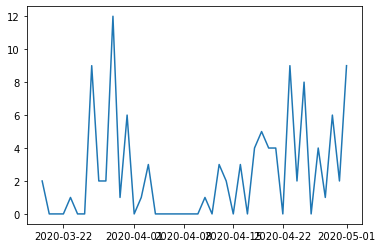

In [187]:
visualizeCasesForCountry(covdf, "Zambia")

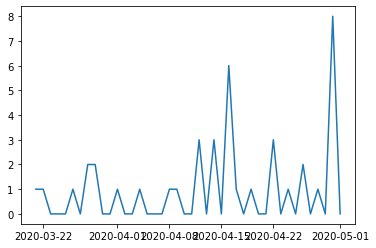

In [188]:
visualizeCasesForCountry(covdf, "Zimbabwe")

In [189]:
# Write a function which will take the covdf Dataframe and two country names as argument
# and will visualize number of cases in these countries for each day in the same plot.
# This will allow to compare the number of cases in two countries. Use Matplotlib for visualization.

import matplotlib.pyplot as plt
import mplcursors

def visualizeCasesFor2Country(df, c1, c2):
    df1 = df.loc[df["countriesAndTerritories"] == c1][["dateRep", "cases"]]
    df2 = df.loc[df["countriesAndTerritories"] == c2][["dateRep", "cases"]]
    mplcursors.cursor(hover=True) # couldn't make it work
    plt.plot(df1["dateRep"], df1["cases"], label='line 1')
    plt.plot(df2["dateRep"], df2["cases"], label='line 2')
    plt.show()

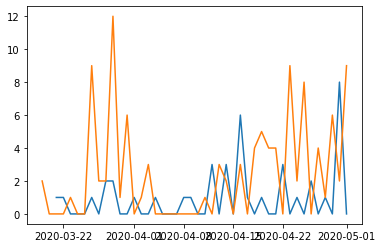

In [190]:
visualizeCasesFor2Country(covdf, "Zimbabwe", "Zambia")